In [ ]:
###HW: [2] 최근 1년간 KOSPI 데이타의 그래프와 5일, 20일, 60일 이동평균선 그래프를 한 평면 위에 그리시오.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CSV 파일에서 데이터 읽기
data = pd.read_csv('과제/kospi.csv', encoding='cp949')
data['날짜'] = pd.to_datetime(data['날짜'])
# 'Close' 열에서 쉼표 제거
data['종가'] = data['종가'].str.replace(',', '')

# 'Close' 열을 실수 유형으로 변환
data['종가'] = data['종가'].astype(float)


In [4]:
#데이터 구조 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      249 non-null    datetime64[ns]
 1   종가      249 non-null    float64       
 2   시가      249 non-null    object        
 3   고가      249 non-null    object        
 4   저가      249 non-null    object        
 5   거래량     249 non-null    object        
 6   변동 %    249 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 13.7+ KB


In [5]:
data['날짜']

0     2023-09-15
1     2023-09-14
2     2023-09-13
3     2023-09-12
4     2023-09-11
         ...    
244   2022-09-23
245   2022-09-22
246   2022-09-21
247   2022-09-20
248   2022-09-19
Name: 날짜, Length: 249, dtype: datetime64[ns]

In [6]:
data['종가']

0      2601.28
1      2572.89
2      2534.70
3      2536.58
4      2556.88
        ...   
244    2290.00
245    2332.31
246    2347.21
247    2367.85
248    2355.66
Name: 종가, Length: 249, dtype: float64

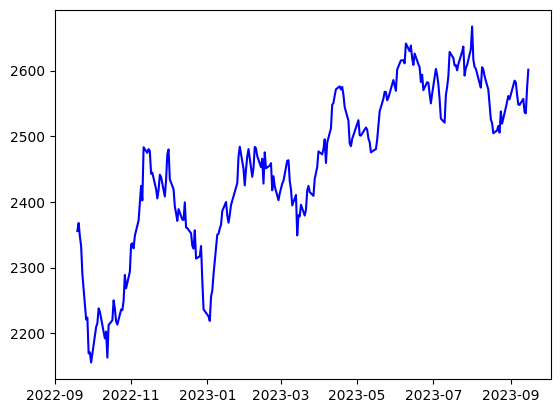

In [7]:
#종가로 그림 그리기
plt.plot(data['날짜'], data['종가'], color="b")
plt.show()

In [8]:
# 이동 평균 계산
data['MA_5'] = data['종가'].rolling(window=5).mean()
data['MA_20'] = data['종가'].rolling(window=20).mean()
data['MA_60'] = data['종가'].rolling(window=60).mean()


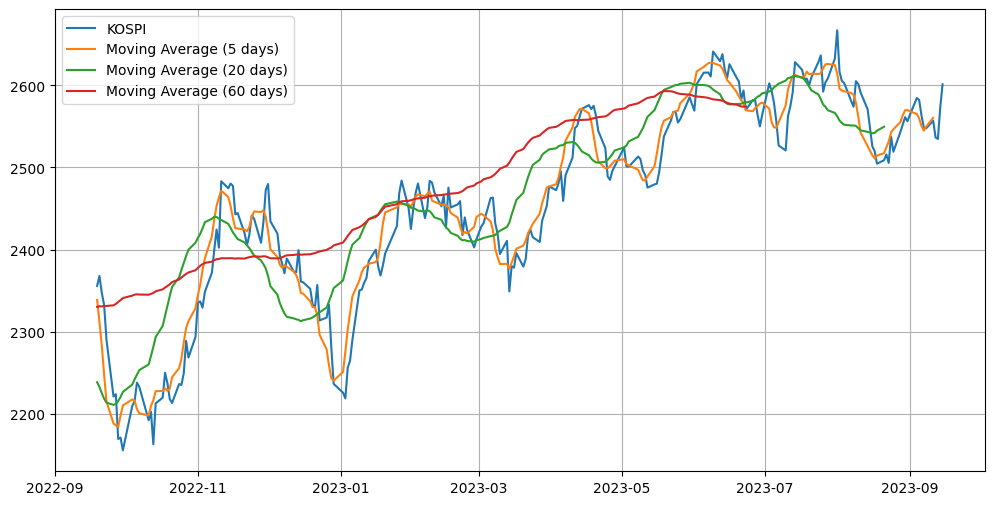

In [10]:
# 그래프 그리기
plt.figure(figsize=(12,6))
plt.plot(data['날짜'], data['종가'], label='KOSPI')
plt.plot(data['날짜'], data ['MA_5'], label='Moving Average (5 days)')
plt.plot(data['날짜'], data ['MA_20'], label='Moving Average (20 days)')
plt.plot(data['날짜'], data ['MA_60'], label='Moving Average (60 days)')
plt.legend(loc='best')
plt.grid()
#plt.show() 
plt.savefig('HW1-2.jpg') 

In [ ]:
###HW: [3] 교재, p.38-39, 문제 1.3(a)-(d)

In [11]:
wt = np.random.normal(0,1,100)

In [12]:
def AR_1(phi2,n): #xt= -0.9*phi1*x_{t-2} + wt
    L=[]
    x0=0 #초기값
    for t in range(2,n):
        xt = phi2*x0+wt[t] #t시점
        L.append(xt)
        x0=xt #초기값 변경
    plt.plot(L)
    plt.show()

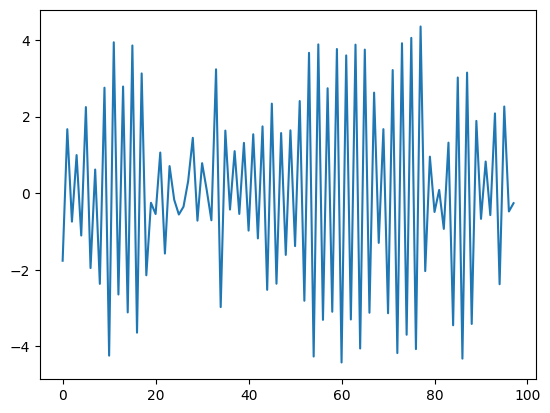

<Figure size 640x480 with 0 Axes>

In [13]:
AR_1(-0.9,100)
plt.savefig('HW1-3a.jpg') 

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_32928\1025655356.py:4: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import shift


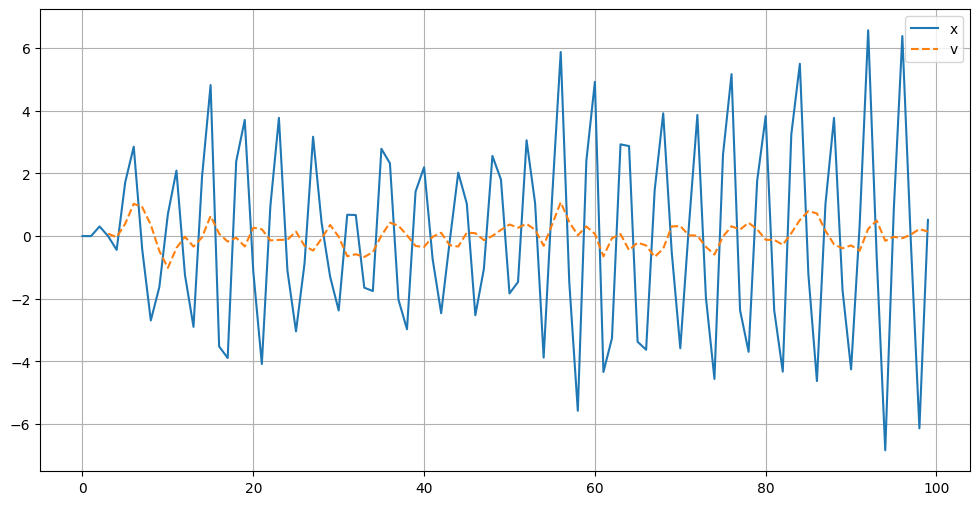

In [15]:
##-(a).
import numpy as np
import pandas as pd
from scipy.ndimage.interpolation import shift
import matplotlib.pyplot as plt

# 설정값
n = 100 
sigma_w = 1

# w_t 생성 (평균 0, 표준편차 sigma_w인 정규분포에서 랜덤 샘플링)
w_t = np.random.normal(0, sigma_w, n)

# x_t 초기화 (모두 0으로 채워진 배열)
x_t = np.zeros(n)

# x_t 계산 (t=2부터 시작)
for t in range(2, n):
    x_t[t] = -0.9 * x_t[t-2] + w_t[t]

# 이동 평균 필터 적용 
v_t = pd.Series(x_t).rolling(window=4).mean()

# 그래프 그리기
plt.figure(figsize=(12,6))
plt.plot(x_t, label='x')
plt.plot(v_t, linestyle='dashed', label='v')
plt.legend(loc='best')
plt.grid()
#plt.show()
plt.savefig('HW1-3a.jpg') 

In [18]:
##-(b). #xt = cos(2 pi t/4)
def COS(n,s): #cos(2 pi t/4)
    t = np.linspace(0,n,n+1) #0,1,2,....,n
    y1 = np.cos(2*np.pi*t/4)
    vt = pd.Series(y1).rolling(window=4).mean()
    plt.figure(figsize=(12,6))
    plt.plot(y1, 'red', label = 'xt')
    plt.plot(vt, 'c', linestyle='dashed', label='v')
    plt.legend(loc='best')
    plt.grid()
    plt.savefig('HW1-3b.jpg') 
    plt.show()

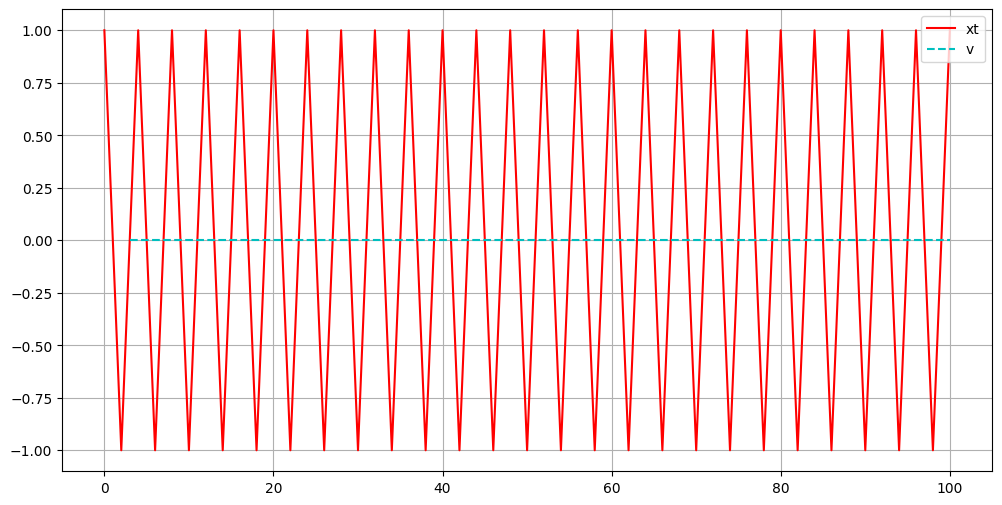

In [19]:
COS(100,1)

In [20]:
##-(c). xt = cos(2 pi t/4) + wt
def COS(n,s): #cos(2 pi t/4) + wt <------- sd = s 표준편차
    t = np.linspace(0,n,n+1) #0,1,2,....,n
    y1 = np.cos(2*np.pi*t/4)
    y2 = y1+np.random.normal(0,s,n+1)
    vt = pd.Series(y2).rolling(window=4).mean()
    plt.figure(figsize=(12,6))
    plt.plot(y2, 'red', label = 'xt')
    plt.plot(vt, 'c', linestyle='dashed', label='v')
    plt.legend(loc='best')
    plt.grid()
    plt.savefig('HW1-3c.jpg') 
    plt.show()


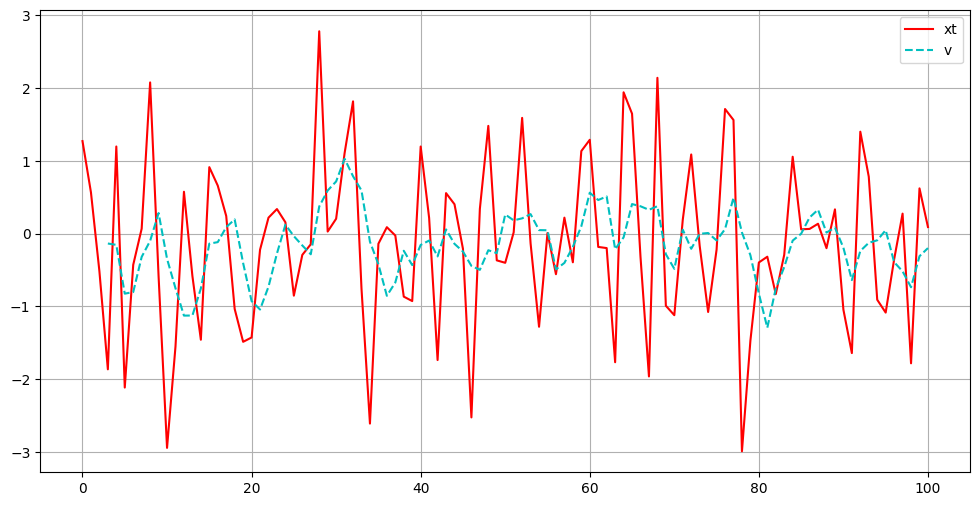

In [21]:
COS(100,1)

In [ ]:
##-(d).
(a) 자기회귀 모델 xt = -0.9xt-2 + wt를 사용하여 생성된 시계열 데이터는 이동 평균 필터를 통해 스무딩되며, 원본 데이터의 잡음이 줄어들게 됩니다. 이로 인해 전체적인 추세가 더 명확하게 보여집니다.

(b) xt = cos(2πt/4) 식에 따라 생성된 시계열 데이터는 주기적인 패턴을 가지고 있습니다. 이동 평균 필터를 적용하면 이 패턴은 그대로 유지되지만, 필터링 과정에서 일부 "스무딩" 효과가 발생하여 선의 진동이 약간 줄어듭니다.

(c) 마지막으로, xt = cos(2πt/4) + wt 식에 따라 생성된 시계열 데이터는 (b)와 비슷한 주기적 패턴을 가지고 있지만 추가적인 잡음이 포함되어 있습니다. 이 경우, 이동 평균 필터를 적용하면 잡음이 크게 감소하며 원래의 cosine 함수 형태가 더욱 명확하게 드러납니다.

즉, 이동 평균 필터는 원본 시계열의 잡음을 줄여주며 전체적인 추세를 보다 명확하게 보여주는 역할을 합니다. 하지만 스무딩(smoothing) 효과로 인해 일부 상세 정보(예: 작은 변화량 등)가 손실될 수도 있습니다.

In [ ]:
###HW: [4]  xt = 0.2wt +0.5wt−1 이고, wt 는 분산이 4인 white noise일때, {xt}의 Autocovariance function, Autocorelation function을 계산하시오.

In [41]:
#wt 생성
def generate_white_noise(n):
    return np.random.normal(0, 2, n)

In [42]:
#xt 생성
def generate_xt(wt):
    xt = []
    for t in range(1, len(wt)):
        xt.append(0.2*wt[t] + 0.5*wt[t-1])
    return np.array(xt)

In [43]:
#Autocovariance function
def AutoCov(D):
    L=[]
    y=D
    n=len(y)
    mu=np.mean(y)
    for h in range(0,n):
        Lh=[]
        for t in range(0,n-h):
            ac=(y[t+h]-mu)*(y[t]-mu)
            Lh.append(ac)
        autocov_h=sum(Lh)/n
        L.append(autocov_h)
    return L

In [44]:
n = 10000 # 원하는 샘플 개수

# White Noise 생성
wt = generate_white_noise(n)

# Xt 생성 
xt = generate_xt(wt)

#Autocovariance function
auto_cov = AutoCov(xt)
print("Auto-Covariance Function: ", auto_cov[:5])

Auto-Covariance Function:  [1.1544406604253765, 0.3912484583064046, -0.01389849689973002, -0.013476244721185542, -0.014032011982864709]


In [45]:
#Autocorelation function
def SACF(D):
    Autocov=AutoCov(D)
    SACF=Autocov/Autocov[0]
    return SACF

In [46]:
#Autocorelation function
auto_corr = SACF(xt)
print("Auto-Correlation Function: ", auto_corr)

Auto-Correlation Function:  [ 1.00000000e+00  3.38907379e-01 -1.20391609e-02 ...  5.66052518e-05
  4.96287894e-05  4.92408054e-06]


In [ ]:
###HW: [5]  yt = 0.1wt+0.3wt−3+0.5wt−5 이고 , wt 는 분산이 100인 white noise일때, {yt}의 Autocovariance function, Autocorelation function을 계산하시오.

In [47]:
#wt 생성
def generate_white_noise(n):
    return np.random.normal(0, 10, n)

In [48]:
#xt 생성
def generate_xt(wt):
    xt = []
    for t in range(5, len(wt)):
        xt.append(0.1*wt[t] + 0.3*wt[t-3] + 0.5*wt[t-5])
    return np.array(xt)

In [49]:
n = 10000 # 원하는 샘플 개수

# White Noise 생성
wt = generate_white_noise(n)

# Xt 생성 
xt = generate_xt(wt)

#Autocovariance function
auto_cov = AutoCov(xt)
print("Auto-Covariance Function: ", auto_cov[:5])

Auto-Covariance Function:  [34.48727571069882, 0.17151496703329452, 14.497876304234925, 2.6859908330953055, -0.4482634455333145]


In [51]:
#Autocorelation function
auto_corr = SACF(xt)
print("Auto-Correlation Function: ", auto_corr)

Auto-Correlation Function:  [ 1.00000000e+00  4.97328257e-03  4.20383344e-01 ... -2.83185968e-04
  9.87717887e-05 -2.48981592e-04]


In [ ]:
###HW: [8] 교재, p.42, 문제 1.20

In [1]:
##-(a). Determine whether xt is stationary.
#Autocovariance function
def AutoCov(D):
    L=[]
    y=D
    n=len(y)
    mu=np.mean(y)
    for h in range(0,20):
        Lh=[]
        for t in range(0,n-h):
            ac=(y[t+h]-mu)*(y[t]-mu)
            Lh.append(ac)
        autocov_h=sum(Lh)/n
        L.append(autocov_h)
    return L

In [2]:
#Autocorelation function
def SACF(D):
    Autocov=AutoCov(D)
    SACF=Autocov/Autocov[0]
    return SACF

In [5]:
# Xt 생성 
xt = np.random.normal(0, 1, 500)

In [7]:
#Autocovariance function
auto_cov = AutoCov(xt)
print("Auto-Covariance Function: ", auto_cov)

Auto-Covariance Function:  [1.00758431478025, 0.006186393039293803, -0.03575801515417168, -0.03372411466502634, 0.020044636353860043, -0.04469832379037965, -0.04208405520187612, 0.0010861771588894266, -0.010760555232201971, -0.02930255373714463, 0.017644355645563586, 0.05914556626627332, -0.0066291299976727345, -0.06485097752237567, -0.017305106821668633, -0.01189193059984911, -0.10471706658422351, 0.005656949729299207, -0.027047356282631847, 0.0026313307184398236]


In [8]:
#Autocorelation function
auto_corr = SACF(xt)
print("Auto-Correlation Function: ", auto_corr)

Auto-Correlation Function:  [ 1.          0.00613983 -0.03548886 -0.03347027  0.01989376 -0.04436187
 -0.04176728  0.001078   -0.01067956 -0.02908199  0.01751154  0.05870036
 -0.00657923 -0.06436283 -0.01717485 -0.01180242 -0.10392884  0.00561437
 -0.02684376  0.00261152]


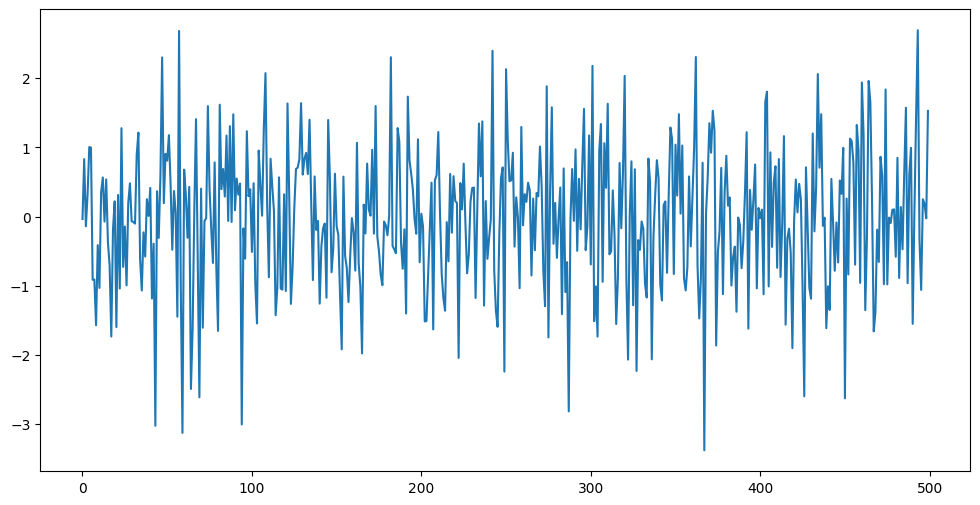

In [10]:
plt.figure(figsize=(12,6))
plt.plot(xt)
plt.savefig('HW1-8a.jpg')
plt.show()

In [11]:
##-(b). Repeat part (a) using only n= 50. How does changing n affect the results?
# Xt 생성 
xt = np.random.normal(0, 1, 50)

In [12]:
#Autocovariance function
auto_cov = AutoCov(xt)
print("Auto-Covariance Function: ", auto_cov)

Auto-Covariance Function:  [0.8983534611062686, -0.03849331733176509, -0.010867289313328454, 0.012703440605858023, -0.163903691714746, -0.057045988058648085, -0.110453712591851, 0.06562464064428163, -0.055648774327407204, -0.06518834419080868, 0.02611750662081045, -0.052671354290806764, 0.02342360519176513, -0.030979882298158103, -0.010989409042553641, 0.023808306926128342, -0.13664471971574424, 0.04819334290037248, -0.058982668192318094, 0.023981852599379253]


In [13]:
#Autocorelation function
auto_corr = SACF(xt)
print("Auto-Correlation Function: ", auto_corr)

Auto-Correlation Function:  [ 1.         -0.04284874 -0.0120969   0.0141408  -0.182449   -0.0635006
 -0.12295129  0.07304991 -0.0619453  -0.07256425  0.02907264 -0.05863099
  0.02607393 -0.03448518 -0.01223283  0.02650216 -0.15210574  0.0536463
 -0.06565642  0.02669534]


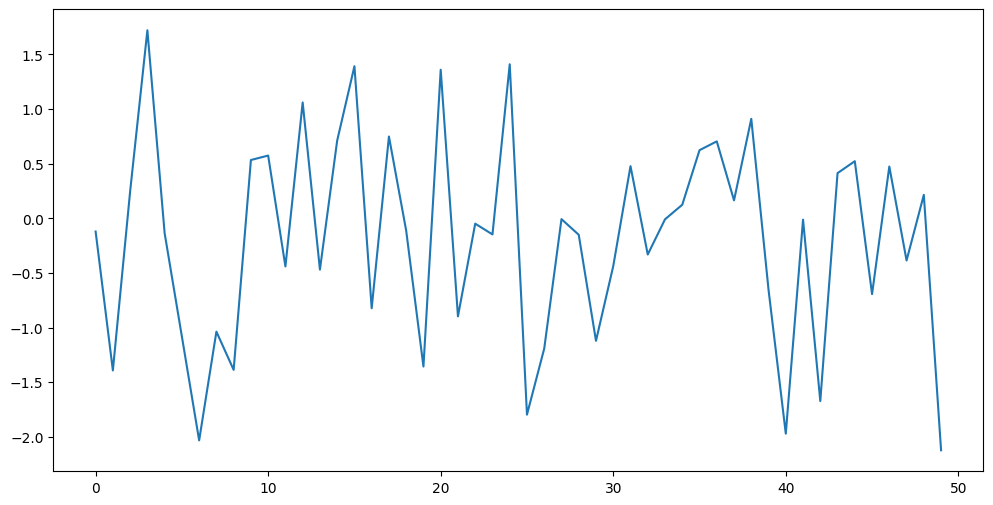

In [14]:
plt.figure(figsize=(12,6))
plt.plot(xt)
plt.savefig('HW1-8b.jpg')
plt.show()

In [18]:

def Moving_average(D):
    L=[]
    n=len(D)
    for t in range(1,n-1): #t=1,2,...,n-2
        vt=np.mean(D[t-1:t+2]) #t-1,t,t+1
        L.append(vt)
    return L


In [23]:
# Xt 생성 
xt = np.random.normal(0, 1, 500)

#moving avaerage
ma_xt = Moving_average(xt)

In [24]:
#Autocovariance function
auto_cov = AutoCov(ma_xt)
print("Auto-Covariance Function: ", auto_cov)

Auto-Covariance Function:  [0.32174280904182134, 0.20531286912812463, 0.1082019317486813, 0.005601988895407027, 0.019184627927025445, 0.017507579380450337, 0.003636374258090629, -0.008684546320854985, -0.009775996366624394, -0.010997100924163332, -0.014297224169862144, -0.017974553636645695, -0.0073906058669524505, 0.00914230993572769, 0.014827917031755549, 0.018309135555755772, 0.0183609857135188, 0.022029592180551005, 0.017119208558656205, -0.0008248794307285962]


In [26]:
#Autocorelation function
auto_corr = SACF(ma_xt)
print("Auto-Correlation Function: ", auto_corr)

Auto-Correlation Function:  [ 1.          0.6381273   0.33629946  0.01741139  0.05962722  0.05441483
  0.01130212 -0.0269922  -0.03038451 -0.03417979 -0.04443681 -0.05586622
 -0.02297054  0.02841496  0.04608624  0.05690612  0.05706728  0.06846957
  0.05320774 -0.00256379]


<function matplotlib.pyplot.show(close=None, block=None)>

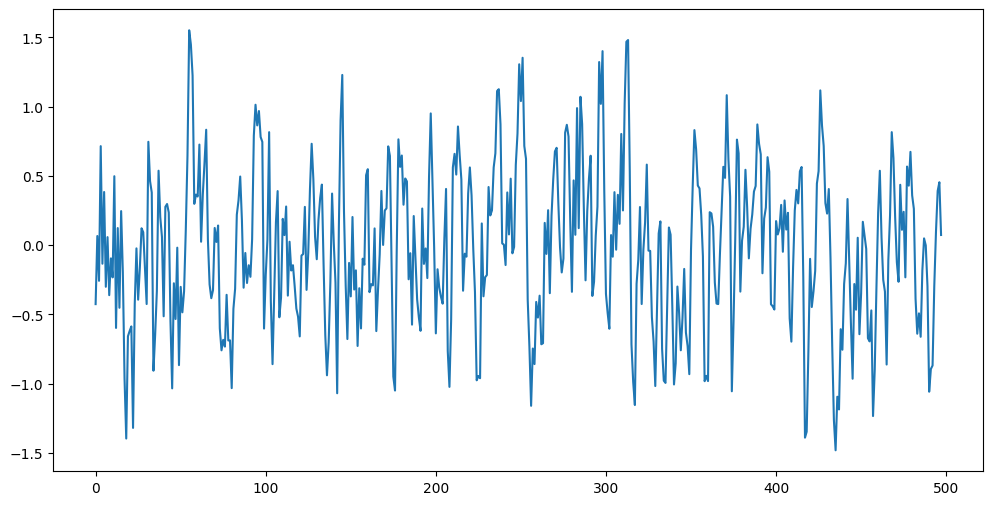

In [27]:
plt.figure(figsize=(12,6))
plt.plot(ma_xt)
plt.savefig('HW1-9a.jpg')
plt.show

In [28]:
##-(b). Repeat part (a) using only n= 50. How does changing n affect the results?
# Xt 생성 
xt = np.random.normal(0, 1, 50)
#moving avaerage
ma_xt = Moving_average(xt)

In [29]:
#Autocovariance function
auto_cov = AutoCov(ma_xt)
print("Auto-Covariance Function: ", auto_cov)

Auto-Covariance Function:  [0.3102790555146024, 0.19321608520941702, 0.045100410572155414, -0.07631995219961492, -0.07566811109163947, -0.027383904969244578, -0.01643387306077409, -0.0391464008659848, -0.09750102199763182, -0.08347527431550188, -0.008810175604148306, 0.06563641952405493, 0.06846643163372808, 0.007763523823471661, -0.05344503092442651, -0.056921655977648374, -0.007800358484394338, 0.05600754927885371, 0.057961293382062434, 0.01901399813568976]


In [30]:
#Autocorelation function
auto_corr = SACF(ma_xt)
print("Auto-Correlation Function: ", auto_corr)

Auto-Correlation Function:  [ 1.          0.62271714  0.14535435 -0.24597198 -0.24387115 -0.08825573
 -0.05296482 -0.12616514 -0.31423656 -0.2690329  -0.02839436  0.21153996
  0.22066082  0.0250211  -0.17224827 -0.1834531  -0.02513982  0.18050703
  0.18680376  0.06128031]


<function matplotlib.pyplot.show(close=None, block=None)>

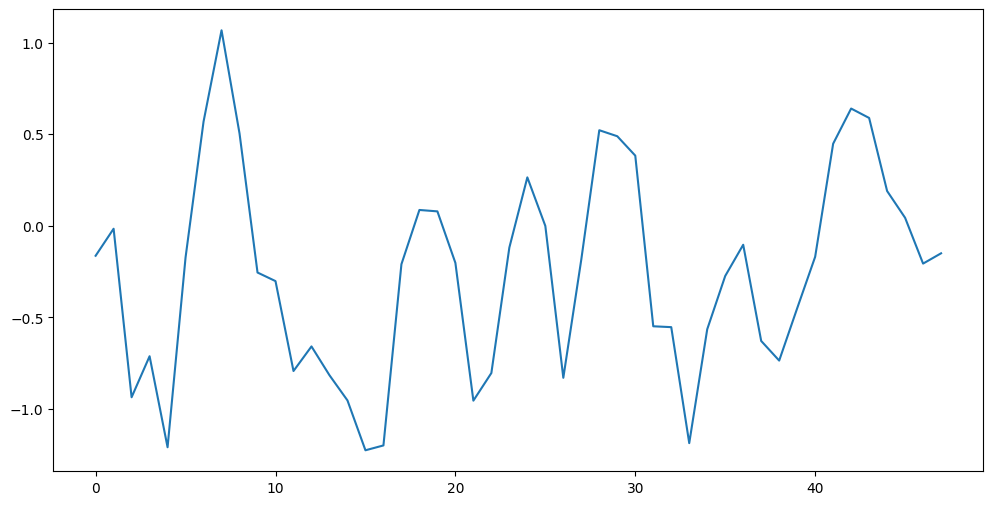

In [31]:
plt.figure(figsize=(12,6))
plt.plot(ma_xt)
plt.savefig('HW1-9b.jpg')
plt.show